<a href="https://colab.research.google.com/github/GaryMarmon/vim/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

Weights =  [-0.12  1.77  0.27]
Bias =  [-0.01]
PLA Accuracy =  1.0


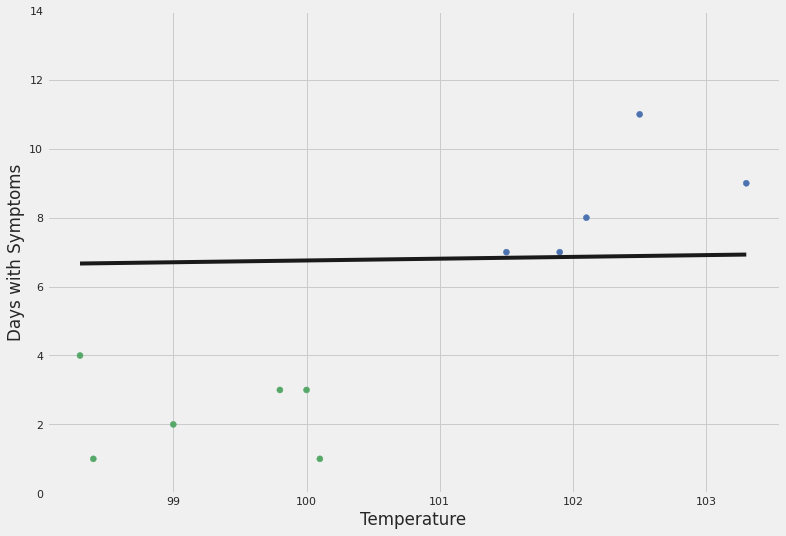

In [199]:
import numpy as np

class PLA:
    def __init__(self, alpha=0.01, iterations=500):
        self.learn_rate = alpha
        self.iterations = iterations
        self.activation = self.activation
        self.weights = None
        self.bias = None

    def activation(self, x):
      """step function applied to an nd array: when x > 0 return 1, else return 0"""

      return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
      """fits training input data X and training labels y"""

      # MxN matrix
      num_rows, num_features = X.shape #pandas function to get (rows,columns)

      # initialize weight vector and bias term to 0
      self.weights = np.zeros(num_features)
      self.bias = 0

      iter = 0 # iter counter
      for _ in range(self.iterations):
          iter +=1
          # loop over training samples
          for idx, x in enumerate(X):
              # get label prediction
              linear_model = np.dot(x, self.weights) + self.bias
              y_pred = self.activation(linear_model)
              # Perceptron update rule: learn_rate * (actual label - predicted label)
              # only works for linearly seperable data
              update = self.learn_rate * (y[idx] - y_pred)
              # update weights and bias
              self.weights += update * x
              self.bias += update

              # print(f"iteration # {iter}")
              # print(f"Updated Weights: {self.weights}")
              # print(f"Updated Bias: {self.bias}")

    def predict(self, X):
      """predicts label given test set X"""

      # transpose(w) * x + b
      linear_model = np.dot(X, self.weights) + self.bias
      y_pred = self.activation(linear_model)
      return y_pred


# Test PLA Class
# main function
if __name__ == "__main__":
    # for plotting
    import matplotlib.pyplot as plt
    import seaborn as sns
    # for splitting data into train and test sets
    from sklearn.model_selection import train_test_split
    # for measuring accuracy of the PLA
    from sklearn.metrics import accuracy_score

    #option to make the fig size larger in jupyter notebooks
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.style.use('fivethirtyeight')

    # create dataset
    data = {'Temperature':[98.6, 99.2, 101.5, 98.4, 99.0, 103.3, 100.1, 98.3, 101.9, 102.5, 102.1, 100.0, 102.7, 99.8],
            'Days':[6, 3, 7, 1, 2, 9, 1, 4, 7, 11, 8, 3, 10, 3],
            'Cough':[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
            'COVID':[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]}
    df = pd.DataFrame(data)

    X = df[['Temperature', 'Days', 'Cough']].values
    y = df[['COVID']].values

    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=33)

    # create PLA class instance with learn_rate=0.01 and 500 iterations
    pla = PLA(alpha=0.01, iterations=10000)
    # fit the data
    pla.fit(X_train, y_train)
    # make predictions
    predictions = pla.predict(X_test)
    # get final weights and bias
    print("Weights = ", pla.weights)
    print("Bias = ", pla.bias)

    # get accuracy of those predictions
    print("PLA Accuracy = ", accuracy_score(y_test, predictions))

    # create plot of linear classifier
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # create scatter plot with colors mapped to labels
    labels = y_train.flatten()
    colormap = np.array(['g', 'b'])
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=colormap[labels])
    # plot boundry
    xmin = np.amin(X_train[:, 0])
    xmax = np.amax(X_train[:, 0])
    plot_x1 = (-pla.weights[0] * xmin - pla.bias) / pla.weights[1]
    plot_x2 = (-pla.weights[0] * xmax - p.bias) / pla.weights[1]
    ax.plot([xmin, xmax], [plot_x1, plot_x2], "k")
    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([0, ymax + 3])
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Days with Symptoms")

    plt.show()